# Exploratory Data Analysis on Dataset - Terrorism 

## Problem Statement
As a security/defense analyst, try to find out the hot zone of terrorism.

You can choose any of the tool of your choice  

(Python/R/Tableau/PowerBI/Excel/SAP/SAS)

# Importing Necessary Libraries

In [1]:
#Data Preprocessing
import pandas as pd 
import numpy as np 
import warnings
warnings.simplefilter("ignore")

#Data Visualization
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
import missingno as msno
%matplotlib inline

In [3]:
plt.style.use('fivethirtyeight')

In [4]:
df= pd.read_csv("terrorism.csv",encoding='ISO-8859-1')

In [5]:
df.shape

(181691, 135)

In [6]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [7]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [8]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 135 columns):
 #    Column              Dtype  
---   ------              -----  
 0    eventid             int64  
 1    iyear               int64  
 2    imonth              int64  
 3    iday                int64  
 4    approxdate          object 
 5    extended            int64  
 6    resolution          object 
 7    country             int64  
 8    country_txt         object 
 9    region              int64  
 10   region_txt          object 
 11   provstate           object 
 12   city                object 
 13   latitude            float64
 14   longitude           float64
 15   specificity         float64
 16   vicinity            int64  
 17   location            object 
 18   summary             object 
 19   crit1               int64  
 20   crit2               int64  
 21   crit3               int64  
 22   doubtterr           float64
 23   alternative         float64
 24 

# Renaming the feature names for better understaning

In [9]:
df.rename(columns = {'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'State','region_txt':'Region','attacktype1_txt':'Attack_type','target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)

# Selecting Necessary Features

In [10]:
df=df[['Year','Month','Day','Country','State','Region','city','latitude','longitude','Attack_type','Killed','Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]

In [11]:
df.head()

,Year,Month,Day,Country,State,Region,city,latitude,longitude,Attack_type,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN


In [12]:
df.tail()

,Year,Month,Day,Country,State,Region,city,latitude,longitude,Attack_type,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive
181686,2017,12,31,Somalia,Middle Shebelle,Sub-Saharan Africa,Ceelka Geelow,2.359673,45.385034,Armed Assault,1.0,2.0,Checkpoint,12/31/2017: Assailants opened fire on a Somali...,Al-Shabaab,Military,Firearms,NaN
181687,2017,12,31,Syria,Lattakia,Middle East & North Africa,Jableh,35.407278,35.942679,Bombing/Explosion,2.0,7.0,Hmeymim Air Base,12/31/2017: Assailants launched mortars at the...,Muslim extremists,Military,Explosives,NaN
181688,2017,12,31,Philippines,Maguindanao,Southeast Asia,Kubentog,6.900742,124.437908,Facility/Infrastructure Attack,0.0,0.0,Houses,12/31/2017: Assailants set fire to houses in K...,Bangsamoro Islamic Freedom Movement (BIFM),Private Citizens & Property,Incendiary,NaN
181689,2017,12,31,India,Manipur,South Asia,Imphal,24.798346,93.940430,Bombing/Explosion,0.0,0.0,Office,12/31/2017: Assailants threw a grenade at a Fo...,Unknown,Government (General),Explosives,NaN
181690,2017,12,31,Philippines,Maguindanao,Southeast Asia,Cotabato City,7.209594,124.241966,Bombing/Explosion,0.0,0.0,Unknown,12/31/2017: An explosive device was discovered...,Unknown,Unknown,Explosives,NaN


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         181691 non-null  int64  
 1   Month        181691 non-null  int64  
 2   Day          181691 non-null  int64  
 3   Country      181691 non-null  object 
 4   State        181270 non-null  object 
 5   Region       181691 non-null  object 
 6   city         181257 non-null  object 
 7   latitude     177135 non-null  float64
 8   longitude    177134 non-null  float64
 9   Attack_type  181691 non-null  object 
 10  Killed       171378 non-null  float64
 11  Wounded      165380 non-null  float64
 12  Target       181055 non-null  object 
 13  Summary      115562 non-null  object 
 14  Group        181691 non-null  object 
 15  Target_type  181691 non-null  object 
 16  Weapon_type  181691 non-null  object 
 17  Motive       50561 non-null   object 
dtypes: float64(4), int64(3),

# Checking for missing values

In [14]:
df.isna().sum()

Year                0
Month               0
Day                 0
Country             0
State             421
Region              0
city              434
latitude         4556
longitude        4557
Attack_type         0
Killed          10313
Wounded         16311
Target            636
Summary         66129
Group               0
Target_type         0
Weapon_type         0
Motive         131130
dtype: int64

## Plotting Missing values

<AxesSubplot: >

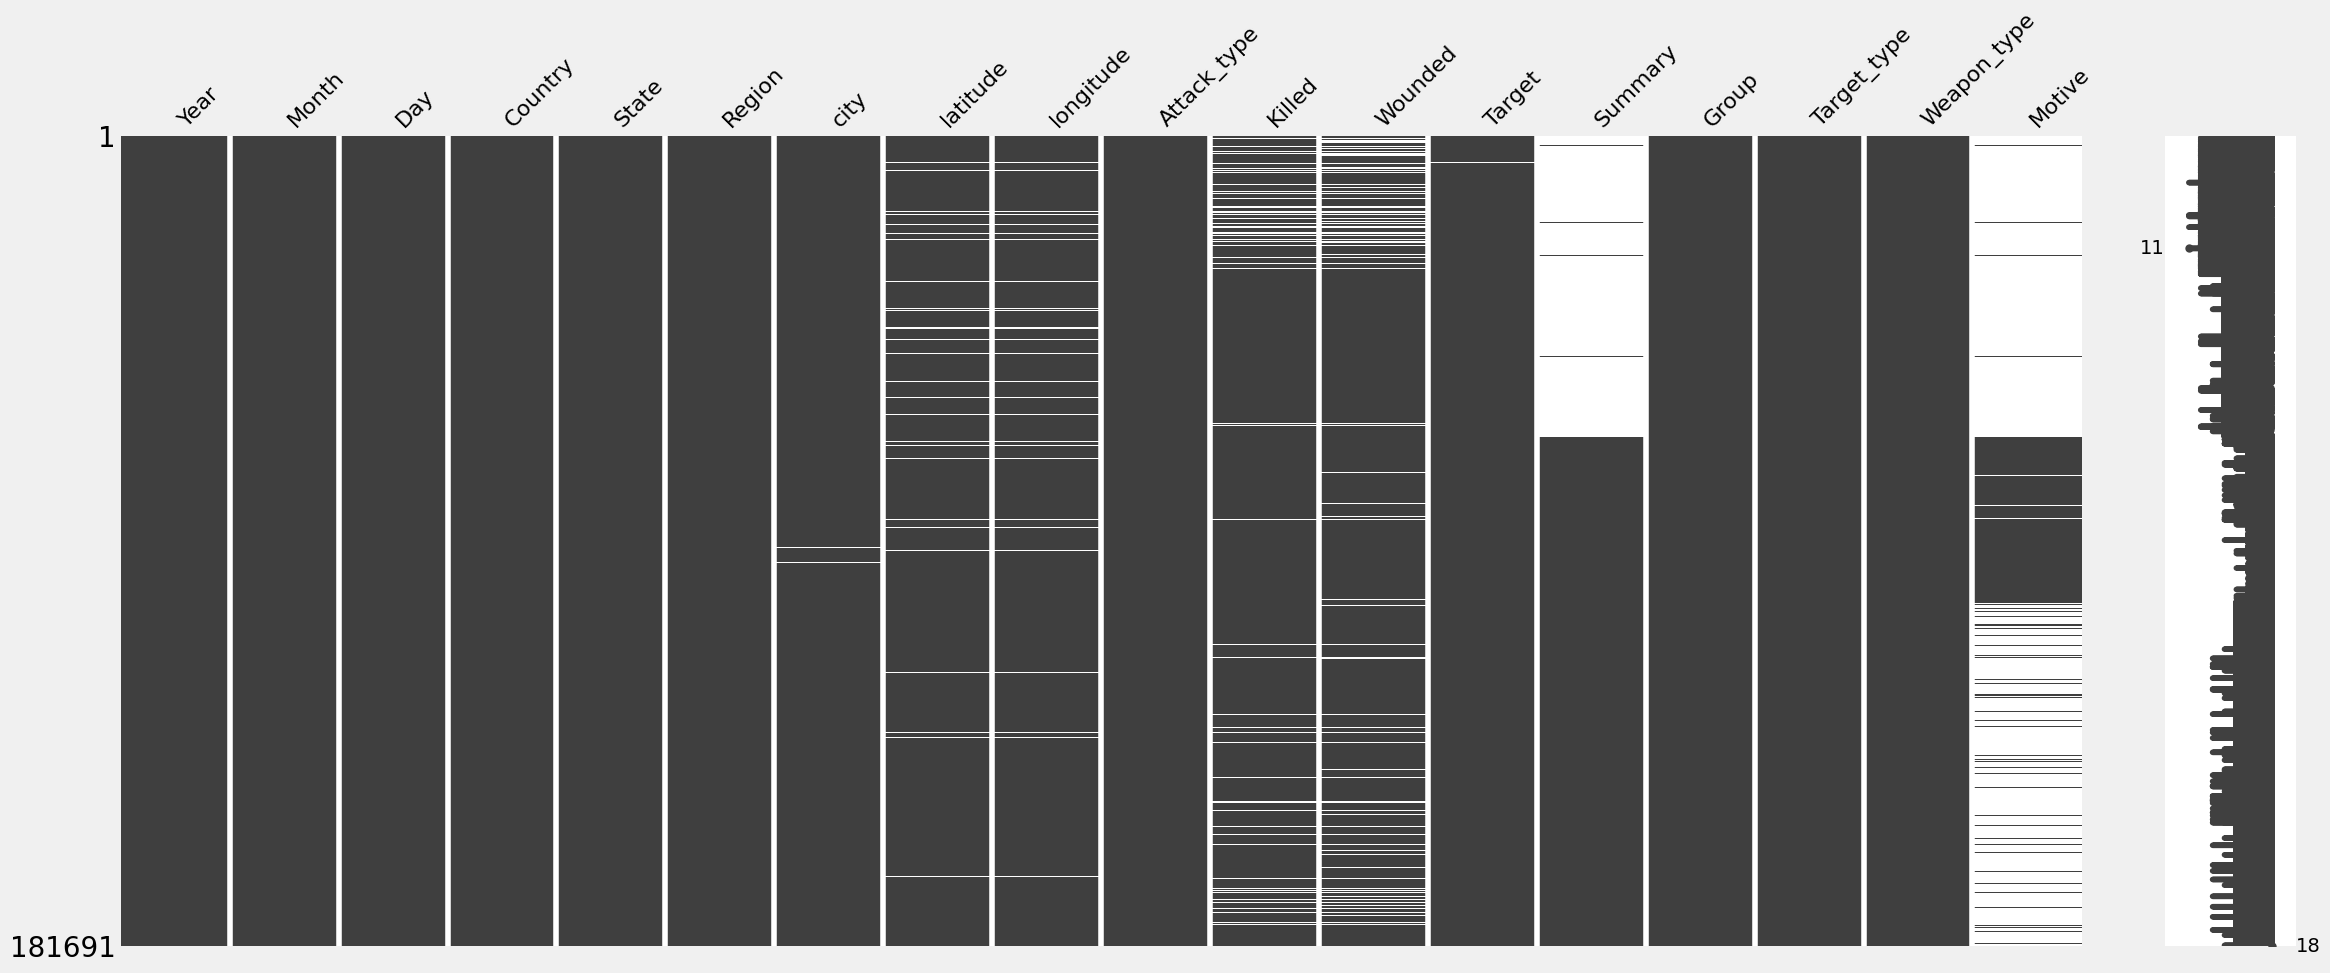

In [15]:
msno.matrix(df)

# Handling Missing Values

In [16]:
# Drop rows with missing latitude or longitude
df = df.dropna(subset=['latitude', 'longitude'])

# Replace missing values with 0
df[['Killed', 'Wounded',"State","city","Target","Summary","Group","Weapon_type","Motive"]] = df[['Killed', 'Wounded',"State","city","Target","Summary","Group","Weapon_type","Motive"]].replace(np.nan, 0)

In [17]:
df.isnull().sum()

Year           0
Month          0
Day            0
Country        0
State          0
Region         0
city           0
latitude       0
longitude      0
Attack_type    0
Killed         0
Wounded        0
Target         0
Summary        0
Group          0
Target_type    0
Weapon_type    0
Motive         0
dtype: int64

In [18]:
df['Killed'].sum()

395224.0

In [19]:
df[["Killed","Wounded"]].describe()

,Killed,Wounded
count,177134.000000,177134.000000
mean,2.231215,2.912614
std,11.171577,34.724034
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,2.000000,2.000000
max,1570.000000,8191.000000


In [20]:
df["Region"].value_counts()

Middle East & North Africa     49577
South Asia                     44479
South America                  18110
Sub-Saharan Africa             17011
Western Europe                 16482
Southeast Asia                 11946
Central America & Caribbean     9344
Eastern Europe                  5117
North America                   3450
East Asia                        794
Central Asia                     548
Australasia & Oceania            276
Name: Region, dtype: int64

# Year wise Terrorist Activities by region

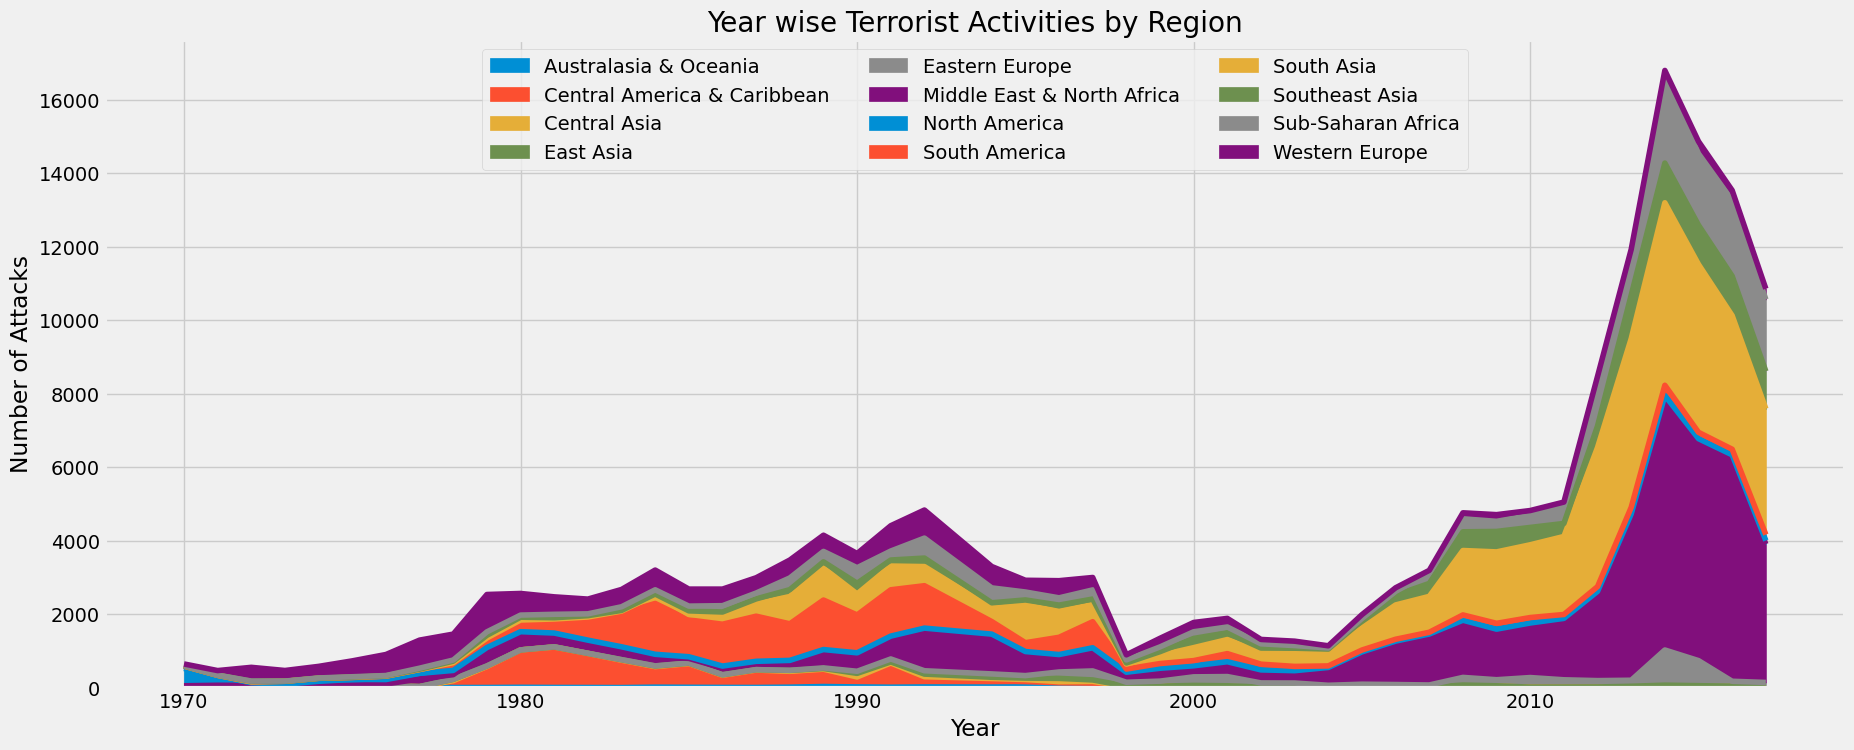

In [21]:
# Year wise Terrorist Activities by region
pd.crosstab(df.Year, df.Region).plot(kind='area',figsize=(20,8))
plt.title('Year wise Terrorist Activities by Region')
plt.ylabel('Number of Attacks')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1), ncol=3) 
plt.show()

# Yearwise target Types of terrorists

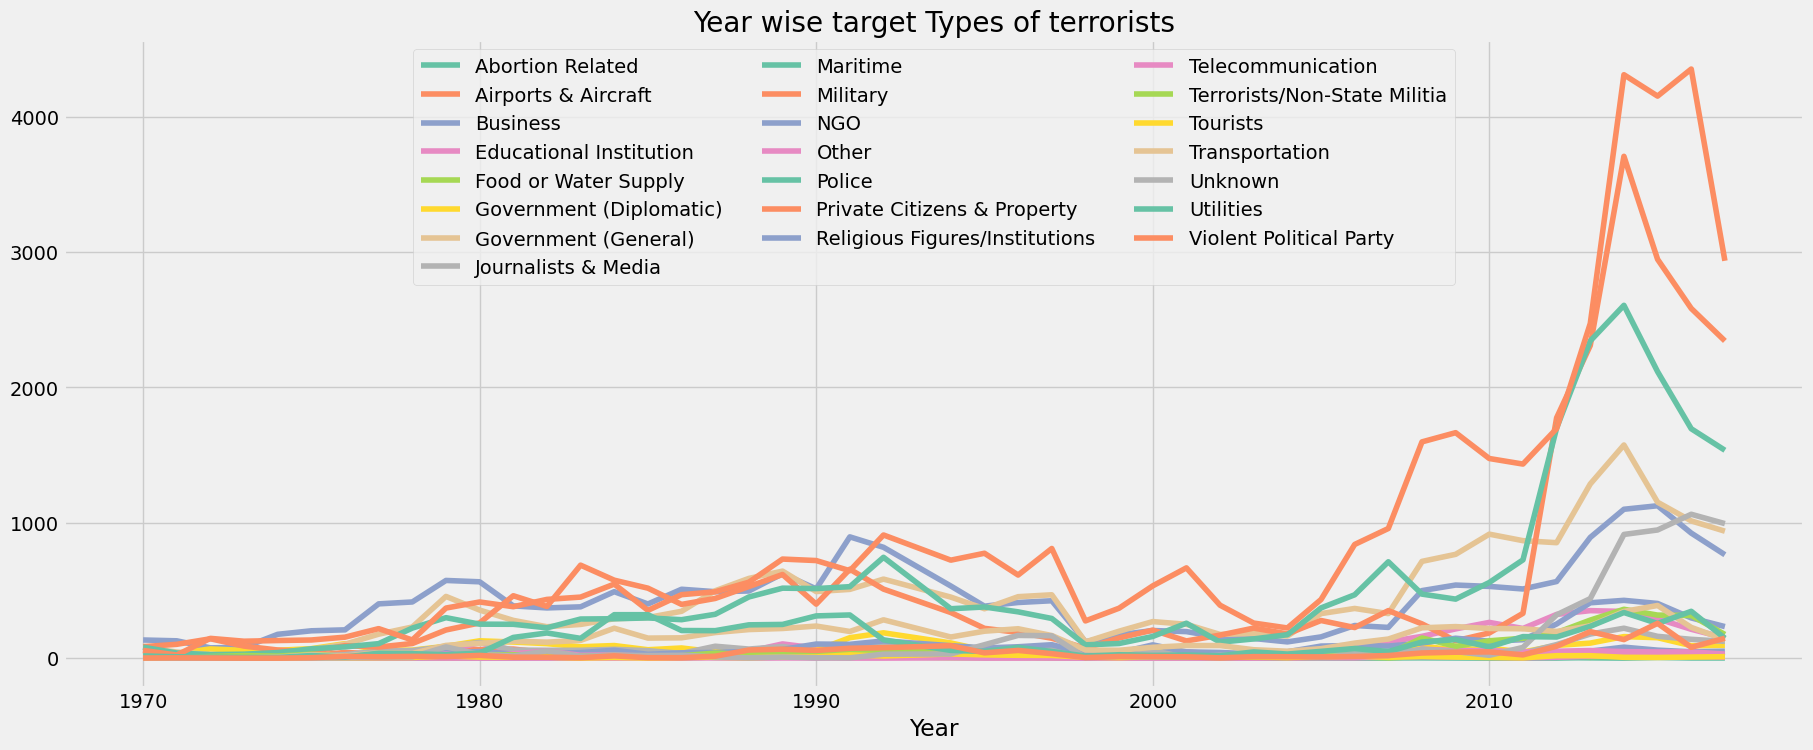

In [22]:
# Yearwise target Types of terrorists
df_region=pd.crosstab(df.Year,df.Target_type)
df_region.plot(color=sns.color_palette('Set2',12))
fig=plt.gcf()
fig.set_size_inches(20,8)
plt.title('Year wise target Types of terrorists')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1), ncol=3) 
plt.show()

# Number Of Terrorist Activities Each Year

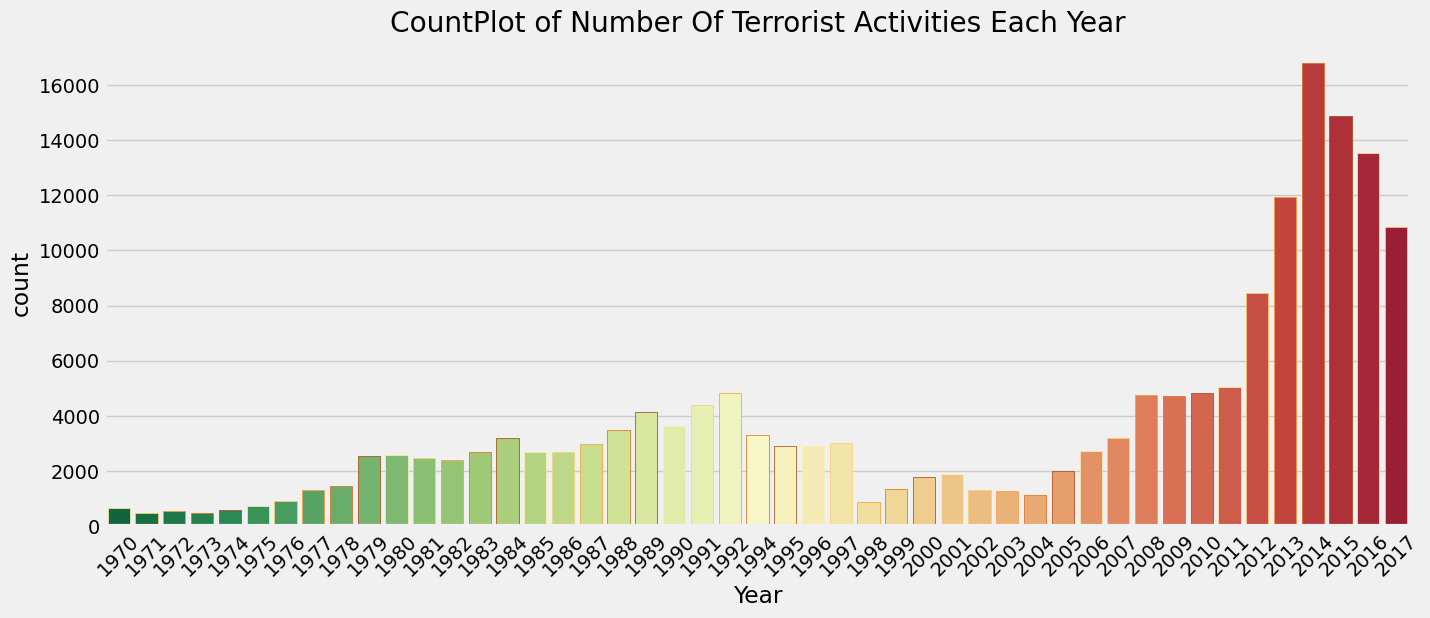

In [23]:
#Countplot
plt.subplots(figsize=(15,6))
sns.countplot(x="Year", data=df, palette='RdYlGn_r',edgecolor=sns.color_palette("YlOrBr", 5))
plt.xticks(rotation=45)
plt.title('CountPlot of Number Of Terrorist Activities Each Year')
plt.show()

# Top 15 Attacked Country

In [24]:
#Top 15 Attacked Country
attack_country = df.Country.value_counts()[:15]
attack_country

Iraq              24487
Pakistan          14318
Afghanistan       12639
India             11801
Colombia           7835
Philippines        6528
Peru               5808
United Kingdom     5227
El Salvador        4846
Turkey             4126
Somalia            4120
Nigeria            3866
Thailand           3806
Yemen              3270
Spain              3195
Name: Country, dtype: int64

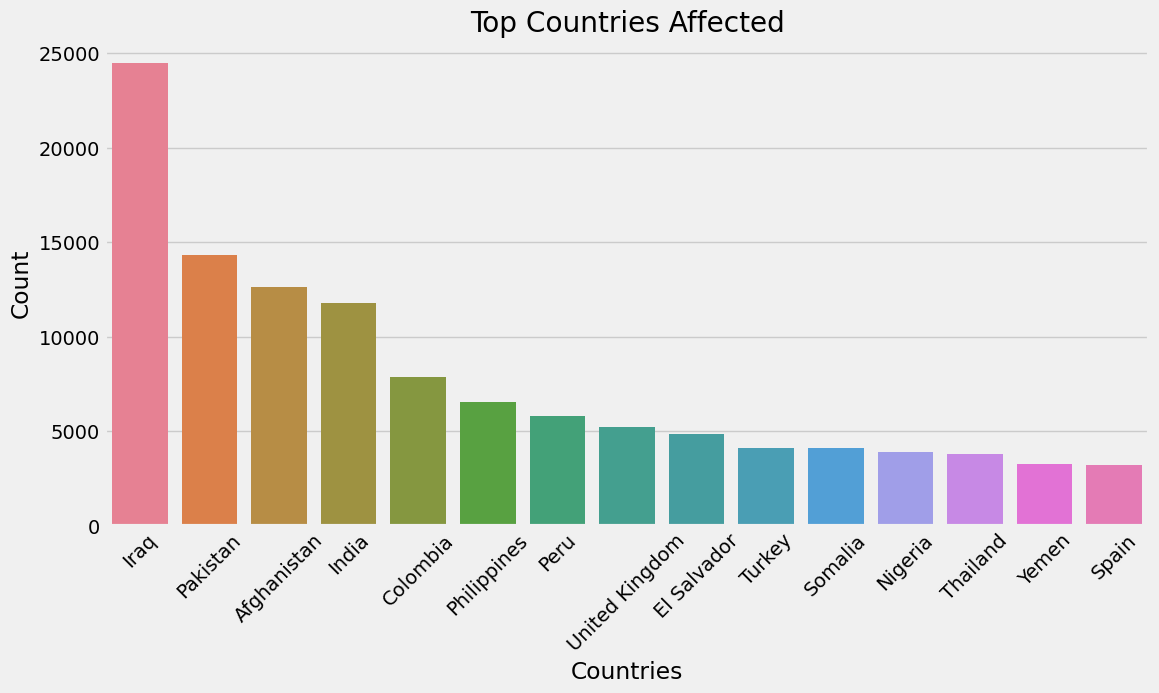

In [25]:
## Top 15 Countries affected by terrorism
plt.subplots(figsize=(12,6))
sns.barplot(x=attack_country.index,y=attack_country.values,palette="husl")
plt.title('Top Countries Affected')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation= 45)
plt.show()

# Top 15 Groups involving most in terrorism

In [26]:
#Top 15 Attack Group
attack_groups = df.Group.value_counts()[1:15]
attack_groups

Taliban                                             7457
Islamic State of Iraq and the Levant (ISIL)         5584
Shining Path (SL)                                   4306
Al-Shabaab                                          3274
Farabundo Marti National Liberation Front (FMLN)    2991
Irish Republican Army (IRA)                         2662
New People's Army (NPA)                             2502
Boko Haram                                          2408
Revolutionary Armed Forces of Colombia (FARC)       2332
Kurdistan Workers' Party (PKK)                      2183
Basque Fatherland and Freedom (ETA)                 1993
Communist Party of India - Maoist (CPI-Maoist)      1876
Maoists                                             1626
Liberation Tigers of Tamil Eelam (LTTE)             1554
Name: Group, dtype: int64

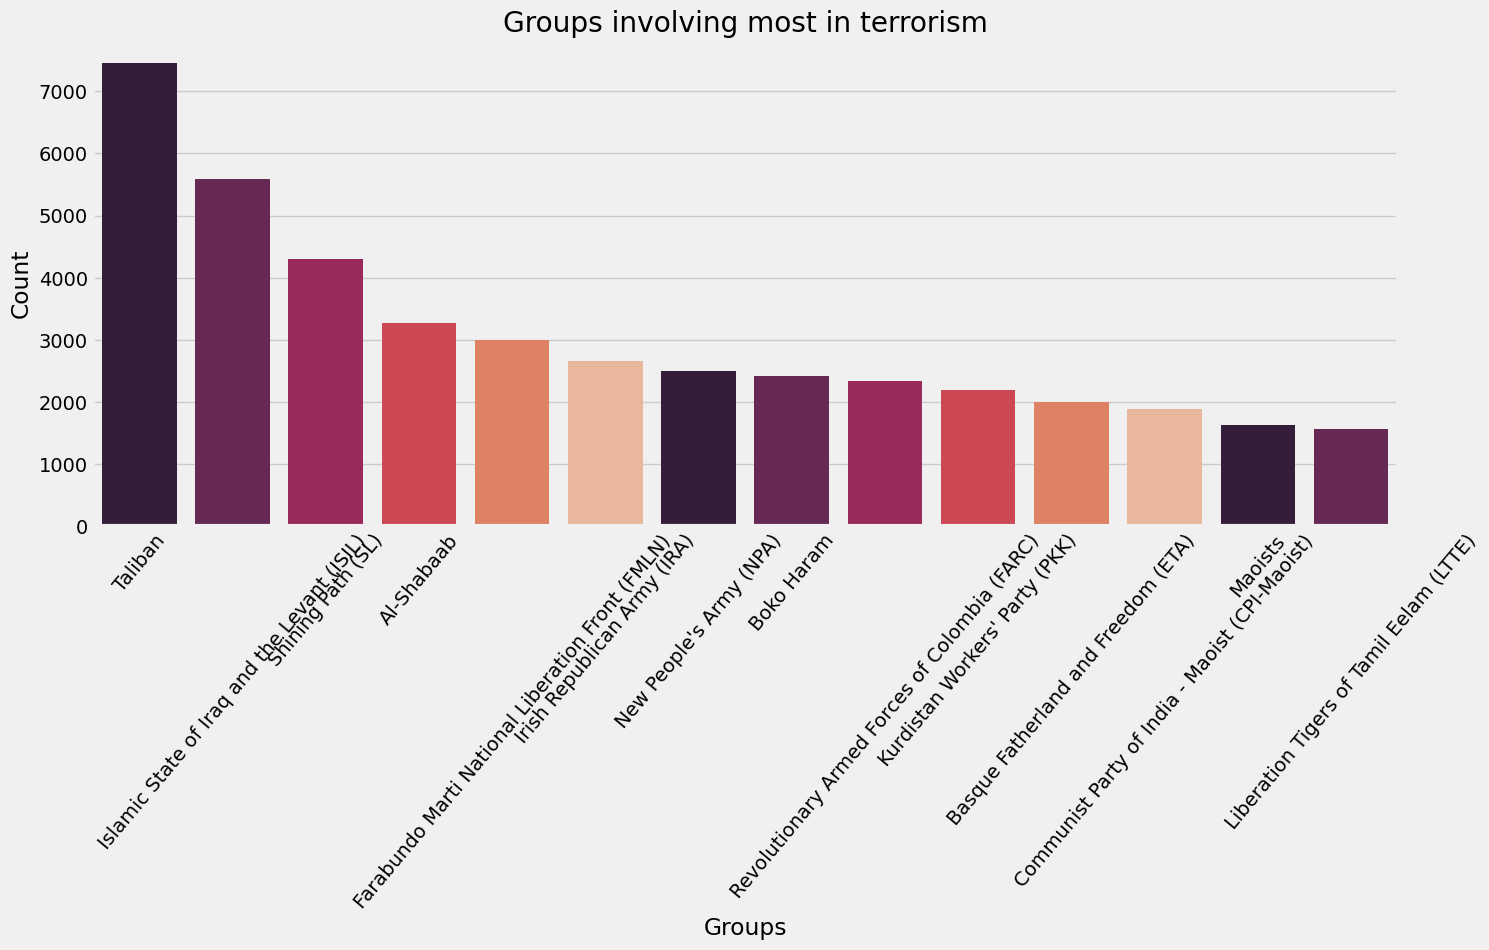

In [27]:
## Top 15 Groups involving most in terrorism
plt.subplots(figsize=(15,6))
sns.barplot(x=attack_groups.index,y=attack_groups.values,palette=sns.color_palette("rocket"))
plt.title('Groups involving most in terrorism')
plt.xlabel('Groups')
plt.ylabel('Count')
plt.xticks(rotation= 50)
plt.show()

# People Killed in each attack type

In [28]:
# People Killed in attack type
attack_killed = df[['Attack_type','Killed']].groupby(["Attack_type"],axis=0).sum()
attack_killed

,Killed
Attack_type,
Armed Assault,149627.0
Assassination,24004.0
Bombing/Explosion,155101.0
Facility/Infrastructure Attack,3587.0
Hijacking,3692.0
Hostage Taking (Barricade Incident),4461.0
Hostage Taking (Kidnapping),23640.0
Unarmed Assault,821.0
Unknown,30291.0


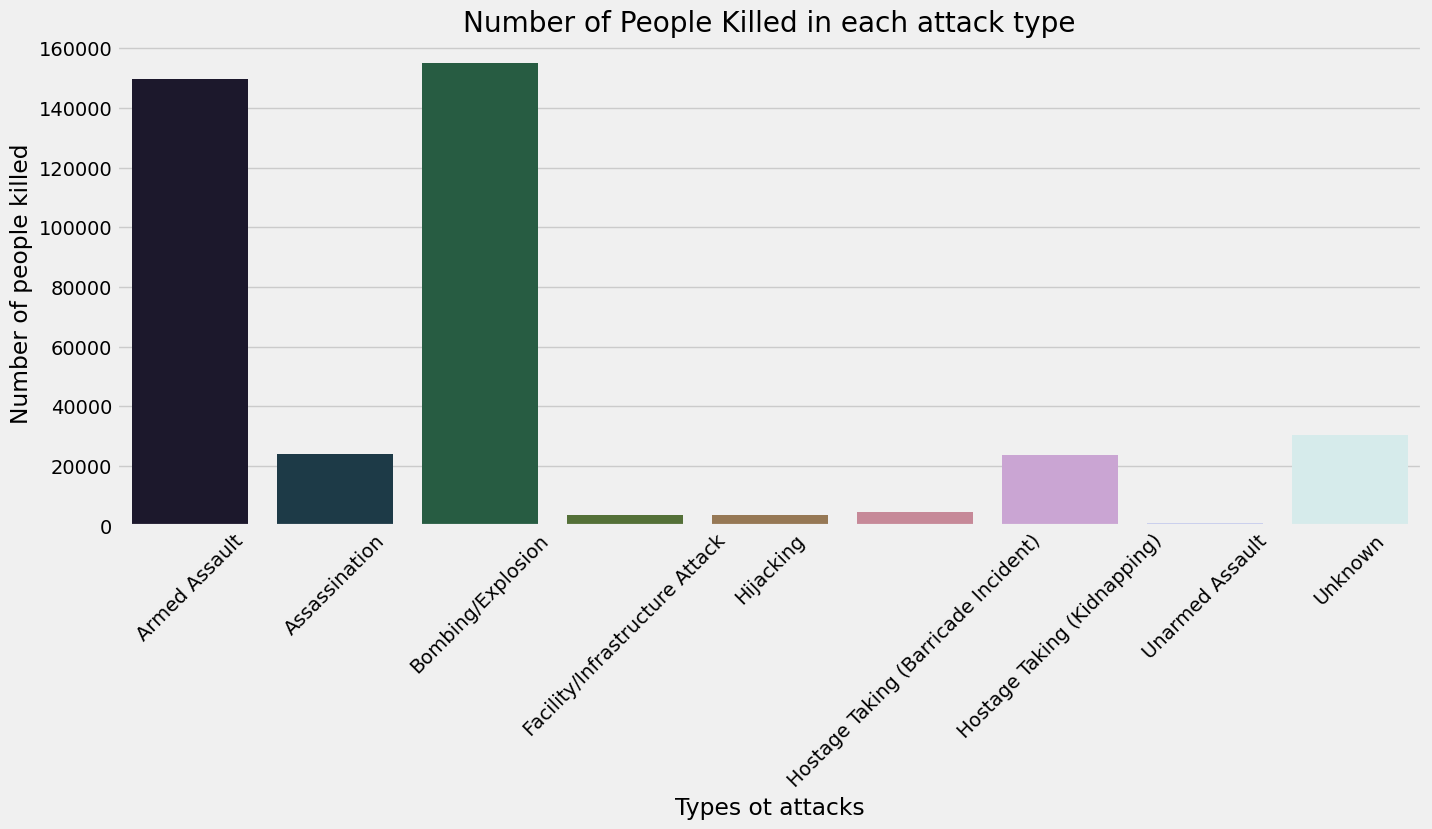

In [29]:
## People Killed in each attack type
plt.subplots(figsize=(15,6))
sns.barplot(x=attack_killed.index, y=attack_killed.Killed.values,palette="cubehelix")
plt.title('Number of People Killed in each attack type')
plt.xlabel('Types ot attacks')
plt.ylabel('Number of people killed')
plt.xticks(rotation= 45)
plt.show()

# Most Target Types by Terrorist

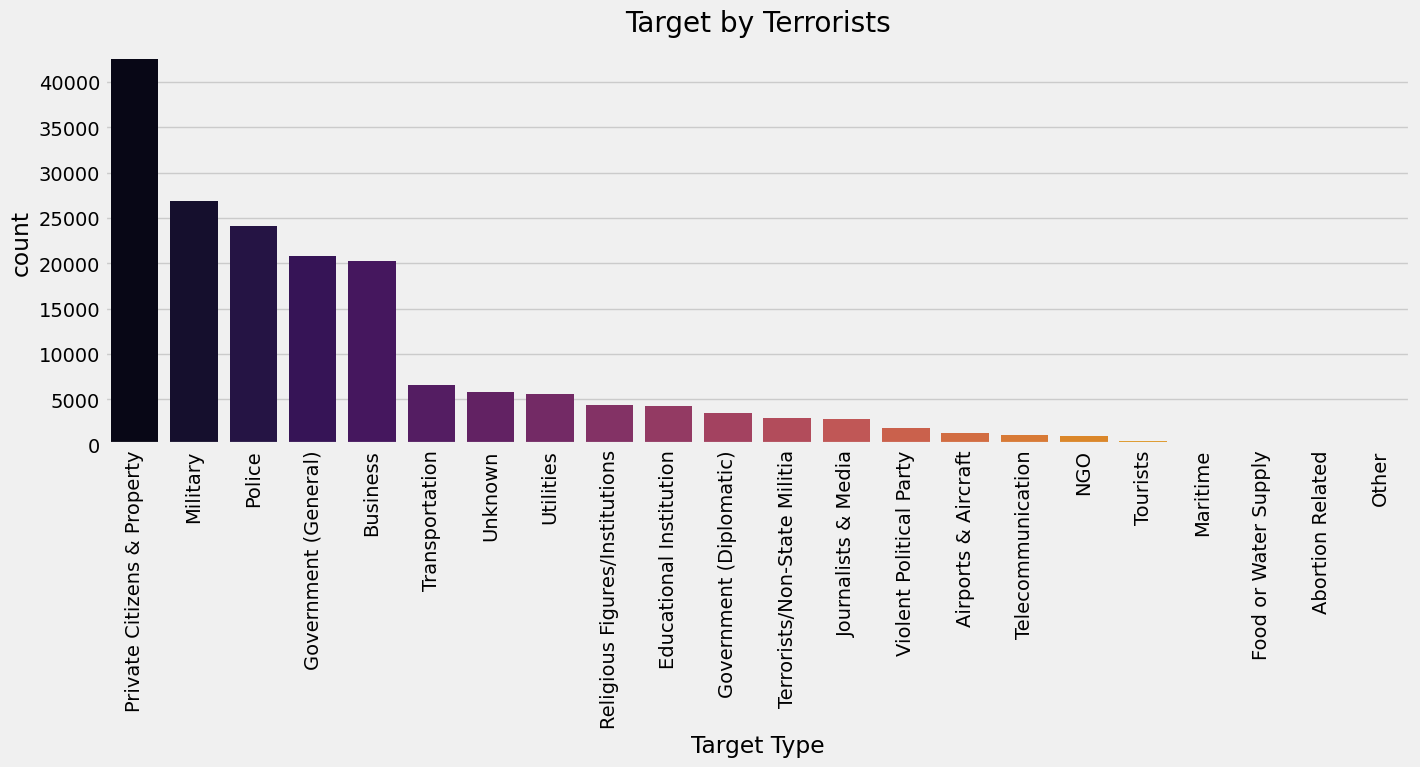

In [30]:
#Target Types by Terrorist
plt.subplots(figsize=(15,5))
sns.countplot(x='Target_type',data=df,palette='inferno',order=df['Target_type'].value_counts().index)
plt.xticks(rotation=90)
plt.xlabel('Target Type')
plt.title('Target by Terrorists')
plt.show()

# People Wounded in Each Attack type

In [31]:
# People wounded in Each Attack type
attack_wounded = df[['Attack_type','Wounded']].groupby(["Attack_type"],axis=0).sum()
attack_wounded

,Wounded
Attack_type,
Armed Assault,74297.0
Assassination,13738.0
Bombing/Explosion,369272.0
Facility/Infrastructure Attack,3597.0
Hijacking,16989.0
Hostage Taking (Barricade Incident),3955.0
Hostage Taking (Kidnapping),6336.0
Unarmed Assault,13854.0
Unknown,13885.0


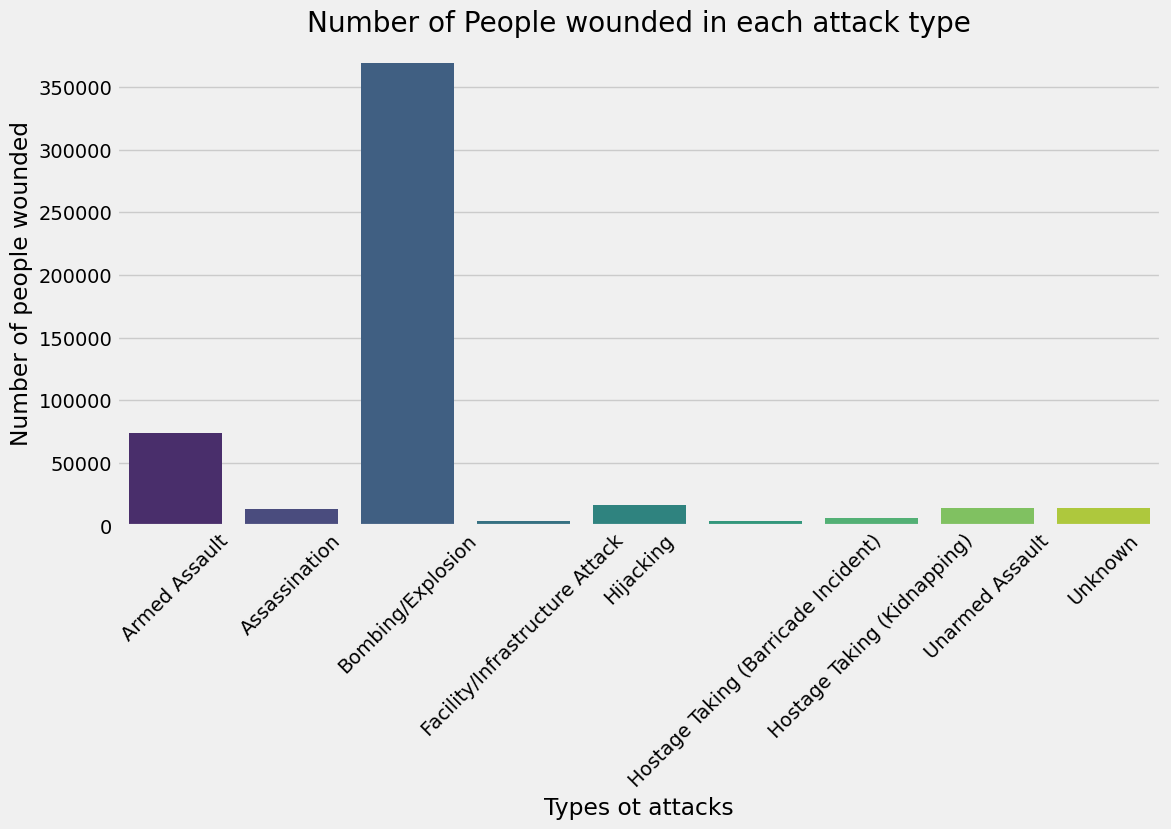

In [32]:
## People Wounded in each attack type
plt.subplots(figsize=(12,6))
sns.barplot(x=attack_wounded.index, y=attack_wounded.Wounded.values,palette="viridis")
plt.title('Number of People wounded in each attack type')
plt.xlabel('Types ot attacks')
plt.ylabel('Number of people wounded')
plt.xticks(rotation= 45)
plt.show()

# Most Weapon Used by Terrorists

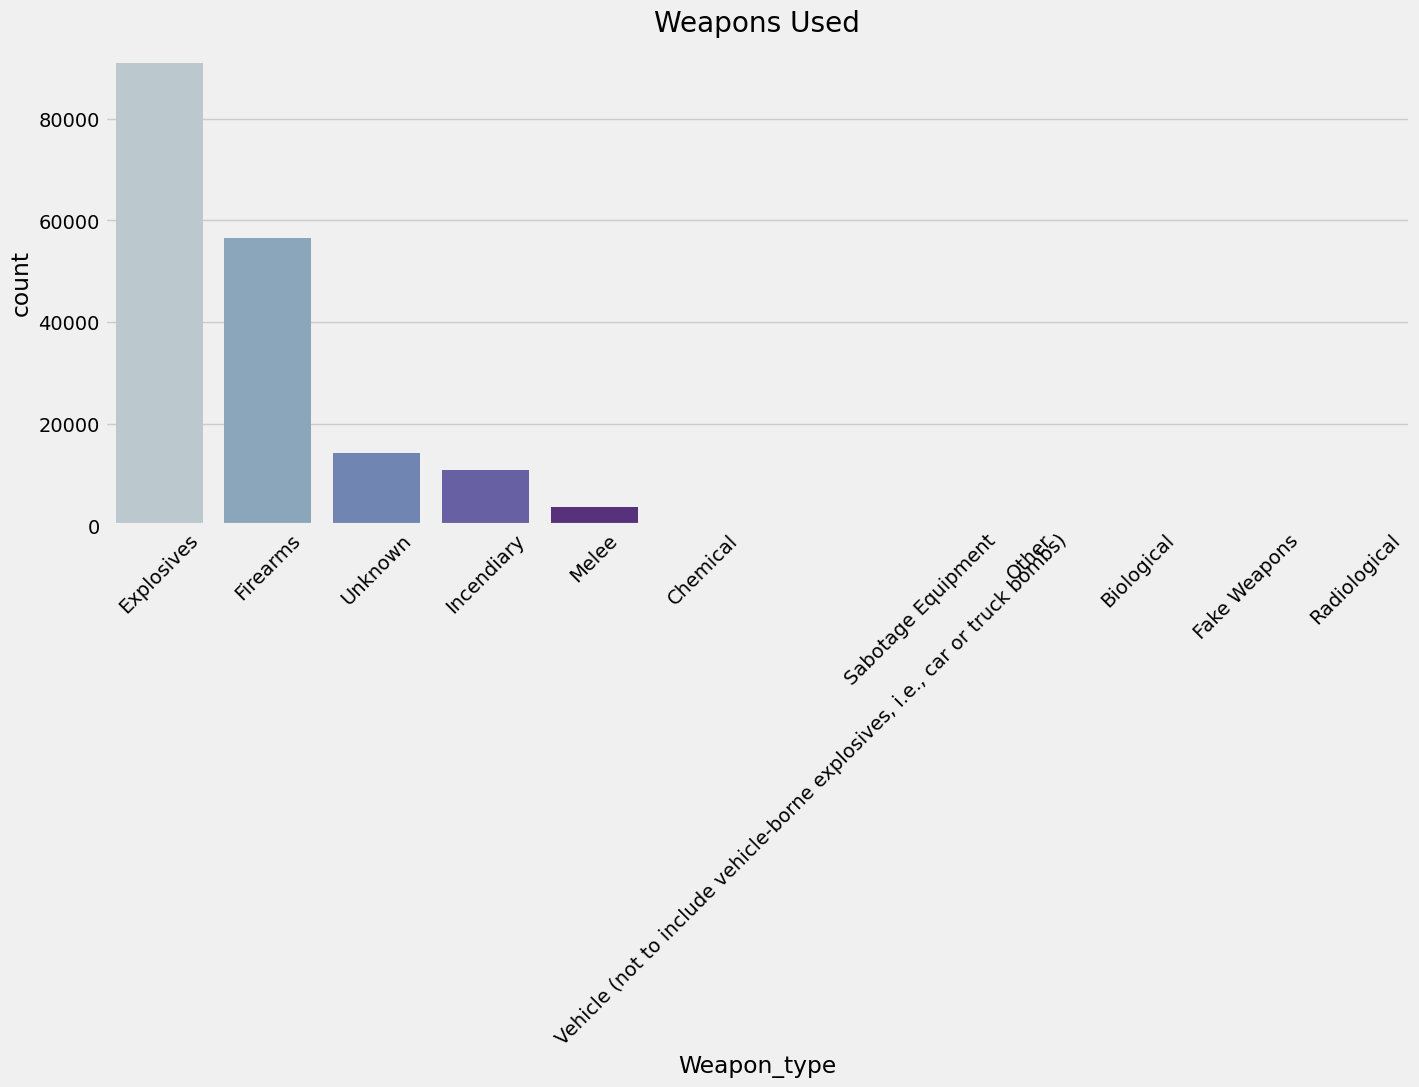

In [33]:
#Weapon Used
plt.figure(figsize=(15,6))
sns.countplot(x='Weapon_type',data=df,palette='twilight',order=df['Weapon_type'].value_counts().index).set_title("Weapons Used")
plt.xticks(rotation=45);

# Thank You